In [1]:
%matplotlib inline

In [2]:
import cv2
import base64
import numpy as np
from PIL import Image
import io
import matplotlib.pyplot as plt
import json

In [5]:
with open('american-airlines-renv.png', 'rb') as image_file:
    base64_encoded_image = base64.b64encode(image_file.read())
    print(type(image_file.read()))

<class 'bytes'>


In [4]:
type(image_file.read())

ValueError: read of closed file

In [5]:
# base64_encoded_image = json.loads(input_data)['data']
base64_decoded_image = base64.b64decode(base64_encoded_image)

image = Image.open(io.BytesIO(base64_decoded_image)).convert("RGB")

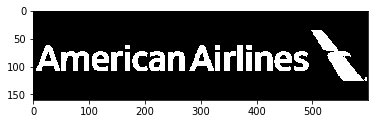

In [6]:
plt.imshow(np.asarray(image))

In [7]:
import requests
data = {}
data['image']=base64_encoded_image.decode('ascii')
headers = {}
headers['Content-Type']='application/json'

In [8]:
r = requests.post("http://localhost:5000/score/model/object_detector", headers=headers, data=json.dumps(data))
print(r.status_code, r.reason)

200 OK


In [16]:
type(r.json())

dict

In [17]:
resp = r.json()

In [20]:
boxes = resp['boxes']